In [1]:
from astroquery.sdss import SDSS
zmin=0.015
zmax=0.05
sql=' SELECT \
      objid,ra,dec,petroMag_g,petroMag_r, \
      extinction_g,extinction_r,z,class \
      FROM SpecPhotoAll \
    WHERE \
      z > {:f} AND z < {:f} AND class = "GALAXY" \
      AND (ra between 140 and 240) and (dec between 0 and 50)'.format(zmin,zmax)
dr18=SDSS.query_sql(sql, data_release=18) 

C:\Users\n10480129\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\astroquery\sdss\core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


Number of galaxies in each luminosity bin:
0.015 <= z < 0.05: [0, 0, 0, 1, 0, 0, 4, 17, 31, 101, 245, 450, 733, 1187, 1628, 2096, 2517, 2978, 3343, 3519, 3904, 4047, 4273, 4519, 4659, 3806, 3277, 2630, 2171, 1673, 1128, 701, 331, 207]. Total = 56176


0.015 <= z < 0.05 Function fit:
M_star = -2.17e+01
phi_star = 2.86e-04
alpha = -1.31e+00




c:\Users\n10480129\OneDrive - Queensland University of Technology\Masters\Repositories\MPhil-Code\LUMFUNCS\main.py:233: RuntimeWarning: divide by zero encountered in log10
  ax.errorbar(lum_bin_centers, np.log10(lf), yerr=[np.log10(lf) - np.log10(low_lf), np.log10(upp_lf) - np.log10(lf)],


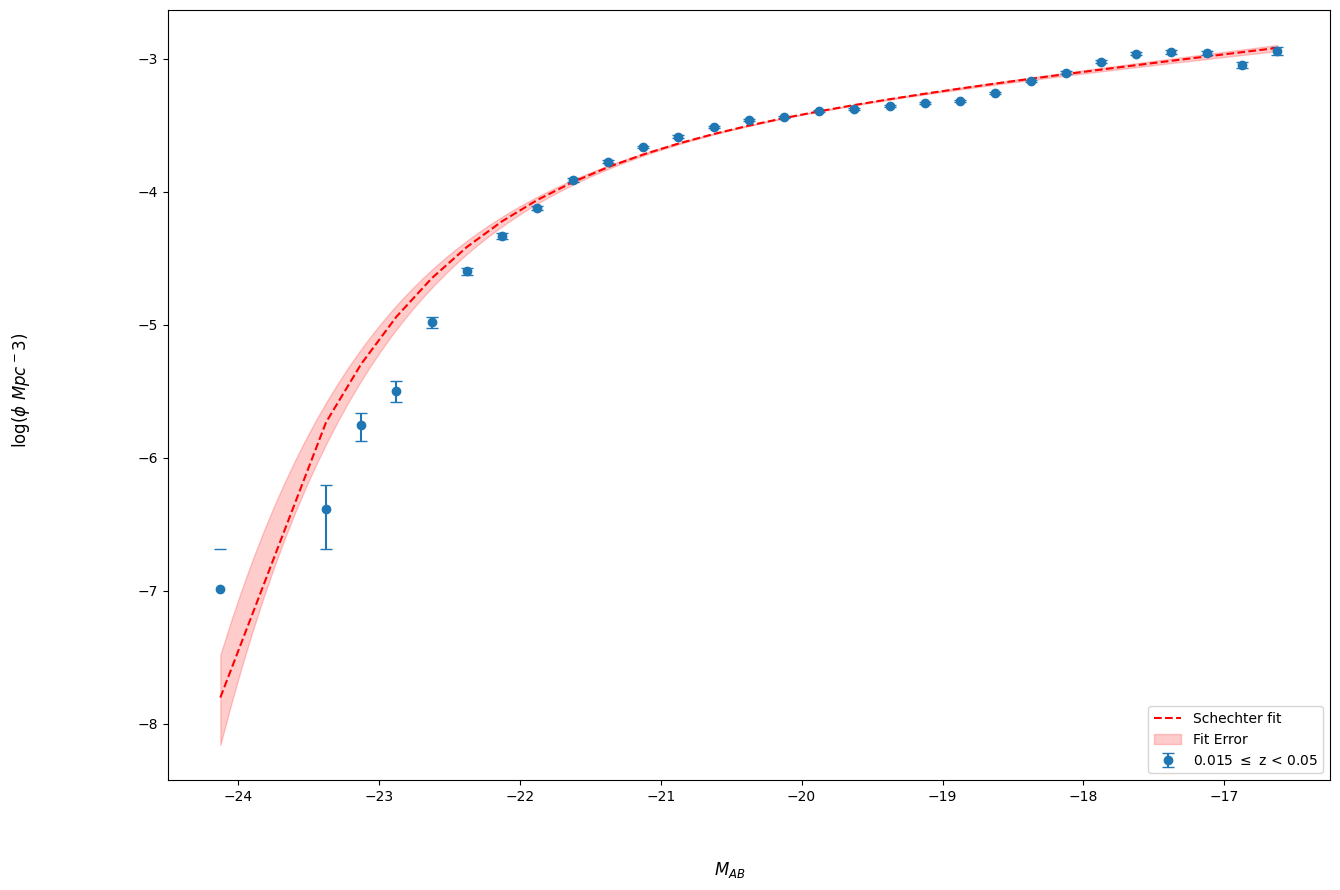

In [2]:
from main import LF
import matplotlib.pyplot as plt

import numpy as np
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

z = dr18['z']
c=3.e5  # km/s
h0=70   # km/s/Mpc
dist=z*c/h0  # distance in Mpc
M_abs = dr18['petroMag_r'] - dr18['extinction_r'] - 5 * np.log10(dist) - 25

z_bins = [(0.015, 0.05)]
lum_bins = np.arange(-25,-16.3,0.25)
mlim = 17.77
survey_area = 41253/4

lf = LF(cosmo, z, M_abs, z_bins, lum_bins, mlim, survey_area, nrows=1, ncols=1)
lf.print_counts()
# lf.plot()
lf.fit(func='Schechter')